In [1]:
import Su22
import qiskit as qk
import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer.noise import NoiseModel
import matplotlib
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.monitor import job_monitor

from qiskit import pulse              
from qiskit.circuit import Parameter 
from IPython.display import display
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
import warnings
warnings.filterwarnings('ignore')
from qiskit.tools.jupyter import *
# The pulse simulator
from qiskit.providers.aer import PulseSimulator

# Object for representing physical models
from qiskit.providers.aer.pulse import PulseSystemModel
token = '792003cde0750f1452faa5cb5fe7c57da849e1119983f608e9a359d49cdb396391d6af09eedfb46af0a043a01103ed64da66835d1a318c0013d64ab3ebc1fe61'
qk.IBMQ.save_account(token=token)
qk.IBMQ.enable_account(token)
provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='phy147')
#backend = provider.get_backend("ibmq_jakarta")
from qiskit.test.mock import FakeJakarta

backend = provider.get_backend("ibmq_jakarta")

configrc.store_credentials:WARNING:2022-08-14 14:49:35,103: Credentials already present. Set overwrite=True to overwrite.


In [9]:
from qiskit.providers.ibmq.managed import IBMQJobManager


job_manager = IBMQJobManager()
job_set = job_manager.retrieve_job_set('b2a7fe6f0c3f4a45a0fc1bab93e974a3-1659144402549291',provider)
results = job_set.results()
    


In [10]:
#job= backend.retrieve_job('62d17565c63c646ce010dfc1')
#results = job.result()
prob = 0
counter = 0
start=0.02
end=0.98#start+((0.98-0.02)/10)
num_center_freqs=100
center_idxs=[]
centers=[]
all_probs_2 = np.zeros([num_center_freqs, 2])
num_noise_trajs= 30
shots = 1000
circ_batch = np.zeros(num_center_freqs*num_noise_trajs)
for center_idx, center in enumerate(np.linspace(start, end, num_center_freqs)): # vary noise center frequency
        center_idxs.append(center_idx)
        centers.append(center)
cc=0
for i in range(int(len(circ_batch)/num_noise_trajs)):
    for circ in circ_batch[i*num_noise_trajs:((i+1)*num_noise_trajs)]:
        zero_counts = results.get_counts(cc).get('1')
        prob += zero_counts/shots
        cc+=1
    prob = prob/num_noise_trajs
    all_probs_2[center_idxs[counter], :] = centers[counter], prob
    counter+=1
    prob=0

Text(0.5, 0, 'Center Frequency')

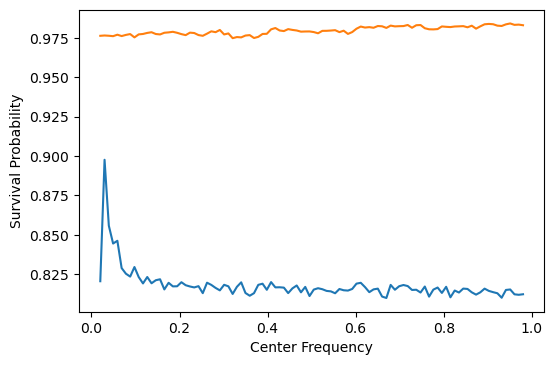

In [11]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax.plot(all_probs_2[:,0], all_probs_2[:,1])
ax.plot(all_probs[:,0], all_probs[:,1])
ax.set_ylabel('Survival Probability')
ax.set_xlabel('Center Frequency')

In [ ]:
for i in (results):
    print(results.get_counts(i))

In [72]:
backend = provider.get_backend("ibmq_guadalupe")
job= backend.retrieve_job('62f977a0edfb14e10bee51dc')
results = job.result()

In [76]:
results.to_dict()

{'backend_name': 'ibmq_guadalupe',
 'backend_version': '1.3.27',
 'qobj_id': 'abc879b3-251b-4f3b-8257-bc799a6791ab',
 'job_id': '62f977a0edfb14e10bee51dc',
 'success': True,
 'results': [{'shots': 1000,
   'success': True,
   'data': {'counts': {'0x0': 538, '0x1': 462}},
   'meas_level': 2,
   'header': {'qubit_labels': [['q', 0],
     ['q', 1],
     ['q', 2],
     ['q', 3],
     ['q', 4],
     ['q', 5],
     ['q', 6],
     ['q', 7],
     ['q', 8],
     ['q', 9],
     ['q', 10],
     ['q', 11],
     ['q', 12],
     ['q', 13],
     ['q', 14],
     ['q', 15]],
    'n_qubits': 16,
    'qreg_sizes': [['q', 16]],
    'clbit_labels': [['c', 0]],
    'memory_slots': 1,
    'creg_sizes': [['c', 1]],
    'name': 'circuit-80696',
    'global_phase': 0.7853981633974483,
    'metadata': {}}},
  {'shots': 1000,
   'success': True,
   'data': {'counts': {'0x0': 519, '0x1': 481}},
   'meas_level': 2,
   'header': {'qubit_labels': [['q', 0],
     ['q', 1],
     ['q', 2],
     ['q', 3],
     ['q', 4],


In [44]:
from matplotlib import animation
import random
from qiskit.circuit import Gate
from qiskit.visualization import visualize_transition
from mpl_toolkits.mplot3d import Axes3D
from qiskit.visualization.bloch import Bloch
from IPython.display import HTML
from qiskit.visualization import plot_bloch_vector
from qiskit import transpile, schedule as build_schedule
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.quantum_info import state_fidelity
from qiskit.providers.aer import noise
# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
import qiskit.ignis.mitigation.measurement as mc
import time
qc = qk.QuantumCircuit(1,1)
qc.x(0)
qc.measure(0,0)
qcy = qk.QuantumCircuit(1,1)
qcy.x(0)
qcy.sdg(0)
qcy.h(0)
qcy.measure(0,0)
qcx = qk.QuantumCircuit(1,1)
qcx.x(0)
qcx.h(0)
qcx.measure(0,0)
StateTomographyFitter(job.result(), [qcx,qcy,qc]).fit()

QiskitError: 'Result for circuit-13 not found'